In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
%matplotlib inline 
import seaborn as sns 
from sklearn.datasets import make_classification

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
X, y = make_classification(n_samples=2000, n_classes=2, weights=[1, 1], random_state=1)

In [4]:
X.shape

(2000, 20)

In [5]:
y

array([0, 0, 0, ..., 1, 1, 0])

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [7]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

## Random Forests

In [8]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_train_pred = rf_model.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = rf_model.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 1.0
RF test roc aurc 0.9858277777777779


In [9]:
y_test_pred

array([[0.01, 0.99],
       [1.  , 0.  ],
       [0.06, 0.94],
       ...,
       [0.01, 0.99],
       [0.96, 0.04],
       [0.  , 1.  ]])

In [10]:
# y_test_pred[:, 1]

## Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
log_classifier = LogisticRegression()
log_classifier.fit(X_train, y_train)
y_train_pred = log_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = log_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.9863568922694498
RF test roc aurc 0.9885777777777777


## AdaBoost Classifier

In [12]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier = AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
y_train_pred = ada_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = ada_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.9975081174960356
RF test roc aurc 0.9826111111111111


## KNN Classifier

In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_train_pred = knn_classifier.predict_proba(X_train)
print('RF trainn roc auc {}'.format(roc_auc_score(y_train, y_train_pred[:,1])))
y_test_pred = knn_classifier.predict_proba(X_test)
print('RF test roc aurc {}'.format(roc_auc_score(y_test, y_test_pred[:,1])))

RF trainn roc auc 0.981670071491109
RF test roc aurc 0.9426111111111111


## Now i will focus on selecting the threshold for maximum accuracy

In [14]:
pred = []
for model in [rf_model, log_classifier, ada_classifier, knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:, 1]))
    
final_prediction = pd.concat(pred, axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test, final_prediction)))

Ensemble test roc-auc: 0.9853777777777778


In [15]:
pd.concat(pred, axis=1)

,0,1,2,3
0,0.99,0.991861,0.559186,1.0
1,0.00,0.000008,0.463282,0.0
2,0.94,0.966929,0.538202,0.8
3,0.95,0.761539,0.509875,0.8
4,0.57,0.779443,0.490344,0.4
...,...,...,...,...
595,0.01,0.024239,0.461121,0.0
596,0.03,0.000003,0.441377,0.0
597,0.99,0.984385,0.532403,1.0
598,0.04,0.001147,0.441720,0.2


## Calculate the roc-curve

In [16]:
fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds

array([1.91188114, 0.91188114, 0.90217349, 0.90077475, 0.79877646,
       0.7980558 , 0.78975303, 0.78912833, 0.77998136, 0.77821156,
       0.76719585, 0.76537124, 0.74097083, 0.73887362, 0.70499037,
       0.70143711, 0.65537883, 0.65493537, 0.61244697, 0.60864346,
       0.58656376, 0.58486186, 0.58212652, 0.58050386, 0.57827749,
       0.57675354, 0.55792732, 0.55389283, 0.55345371, 0.54377948,
       0.51365858, 0.47616892, 0.44950602, 0.43294916, 0.4296034 ,
       0.41186151, 0.40379719, 0.34933098, 0.34836612, 0.23719741,
       0.23640421, 0.23467239, 0.23396893, 0.20416474, 0.20348417,
       0.12559762, 0.1253351 , 0.10498954])

In [17]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thres in thresholds:
    y_pred = np.where(final_prediction > thres, 1, 0)
    accuracy_ls.append(accuracy_score(y_test, y_pred, normalize=True))

accuracy_ls = pd.concat([pd.Series(thresholds), pd.Series(accuracy_ls)], axis=1)
accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)

In [18]:
accuracy_ls.head()

,thresholds,accuracy
33,0.432949,0.960000
32,0.449506,0.960000
34,0.429603,0.958333
31,0.476169,0.958333
27,0.553893,0.958333


In [19]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristics (ROC) Curve')
    plt.legend()
    plt.show()

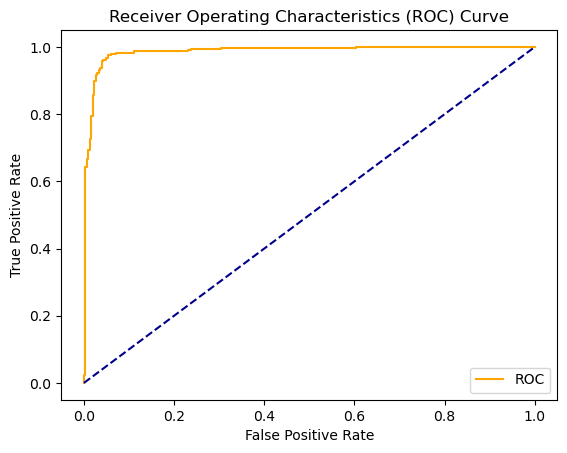

In [20]:
plot_roc_curve(fpr, tpr)